<a href="https://colab.research.google.com/github/srisharaj/srisharaj/blob/main/Plant_Disease_Detection_Project_Source_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import Libraries
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd

In [ ]:
image_size = [224, 224]
train_dir = '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train'
val_dir = '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/valid'

In [ ]:
vgg = VGG16(input_shape = image_size + [3], weights = 'imagenet', include_top = False)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
from glob import glob
folders = glob('/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/*')

In [ ]:
folders

['/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_mosaic_virus',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot']

In [ ]:
x = Flatten()(vgg.output)

In [ ]:
#Build Model
prediction = Dense(len(folders), activation = 'softmax')(x)
model = Model(inputs = vgg.input, outputs = prediction)
model.summary()     

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_data_gen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_set = train_data_gen.flow_from_directory('/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train', target_size = (224,224), batch_size = 32, class_mode = 'categorical')

Found 9189 images belonging to 5 classes.


In [ ]:
test_set = test_data_gen.flow_from_directory('/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/valid', target_size = (224,224), batch_size = 32, class_mode = 'categorical')


Found 2297 images belonging to 5 classes.


Text(0.5, 1.0, 'Bacterial Spot')

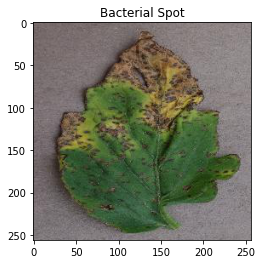

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot/0c09c121-e945-4b7e-acbf-dff4e0d01acb___GCREC_Bact.Sp 3379.JPG"))
plt.title("Bacterial Spot")

In [ ]:
predictions = Dense(len(folders),name='output', activation="softmax")(x)
len(folders)

5

In [ ]:
#train model
mod = model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(train_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/5
288/288 [==============================] - 2349s 8s/step - loss: 0.3817 - accuracy: 0.8657 - val_loss: 0.1897 - val_accuracy: 0.9286
Epoch 2/5
288/288 [==============================] - 138s 479ms/step - loss: 0.1763 - accuracy: 0.9375 - val_loss: 0.1484 - val_accuracy: 0.9430
Epoch 3/5
288/288 [==============================] - 138s 480ms/step - loss: 0.1377 - accuracy: 0.9493 - val_loss: 0.1260 - val_accuracy: 0.9565
Epoch 4/5
288/288 [==============================] - 138s 479ms/step - loss: 0.1332 - accuracy: 0.9527 - val_loss: 0.1116 - val_accuracy: 0.9543
Epoch 5/5
288/288 [==============================] - 138s 480ms/step - loss: 0.1118 - accuracy: 0.9595 - val_loss: 0.1242 - val_accuracy: 0.9586


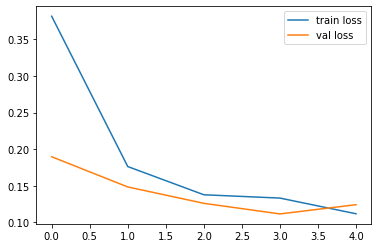

In [ ]:
# Training and Validation loss
import matplotlib.pyplot as plt
plt.plot(mod.history['loss'], label='train loss')
plt.plot(mod.history['val_loss'], label='val loss')
plt.legend()
plt.show()

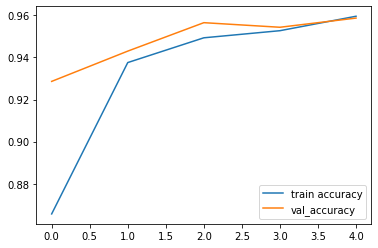

In [ ]:
# Training and Validation accurarcy
plt.plot(mod.history['accuracy'], label='train accuracy')
plt.plot(mod.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(train_set, verbose=1)
loss_v, accuracy_v = model.evaluate(test_set, verbose=1)
print("Validation: accuracy = %f  ; loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

72/72 [==============================] - 12s 171ms/step - loss: 0.1242 - accuracy: 0.9586
Validation: accuracy = 0.958642  ; loss_v = 0.124163
Test: accuracy = 0.971161  ;  loss = 0.081153


In [ ]:
#Save Model
model.save("my_model.h5")

In [ ]:
#Test Model
from tensorflow import keras
model = keras.models.load_model('my_model.h5')

'Tomato___Tomato_mosaic_virus'

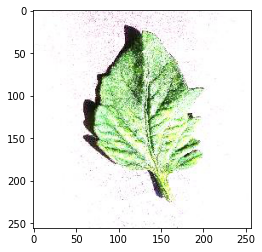

In [ ]:
from keras.models import load_model
classifier = load_model('/content/my_model.h5')
path = "/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/valid/Tomato___Tomato_mosaic_virus/03b6acc7-41a6-4670-b47c-bef6d4baea18___PSU_CG 2363_newPixel25.JPG"
test_image = image.load_img(path)
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.imshow(test_image)
test_img = image.load_img(path, target_size=(224,224))
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img,axis=0)
result = classifier.predict(test_img)
a = result.argmax()
s = train_set.class_indices
name = [ ]
for i in s:
     name.append(i)
for i in range(len(s)):
     if (i==a):
          p=name[i]
P

'Tomato___Late_blight'

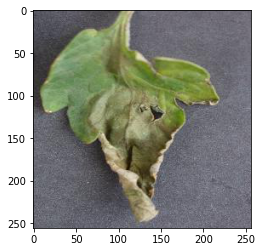

In [ ]:
from keras.models import load_model
classifier = load_model('/content/my_model.h5')
path = "/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/valid/Tomato___Late_blight/01cd2d73-c741-45a5-9610-a2cea2266b80___GHLB2 Leaf 121_flipLR.JPG"
test_image = image.load_img(path)
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.imshow(test_image)
test_img = image.load_img(path, target_size=(224,224))
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img,axis=0)
result = classifier.predict(test_img)
a = result.argmax()
s = train_set.class_indices
name = [ ]
for i in s:
     name.append(i)
for i in range(len(s)):
     if (i==a):
          p=name[i]
p

'Tomato___Early_blight'

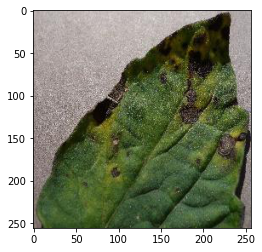

In [ ]:
from keras.models import load_model
classifier = load_model('/content/my_model.h5')
path = "/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/valid/Tomato___Early_blight/0012b9d2-2130-4a06-a834-b1f3af34f57e___RS_Erly.B 8389.JPG"
test_image = image.load_img(path)
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.imshow(test_image)
test_img = image.load_img(path, target_size=(224,224))
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img,axis=0)
result = classifier.predict(test_img)
a = result.argmax()
s = train_set.class_indices
name = [ ]
for i in s:
     name.append(i)
for i in range(len(s)):
     if (i==a):
          p=name[i]
p

'Tomato___healthy'

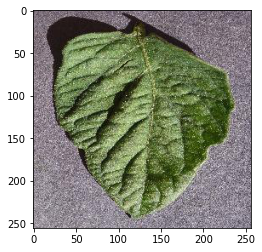

In [ ]:
from keras.models import load_model
classifier = load_model('/content/my_model.h5')
path = "/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/valid/Tomato___healthy/00bce074-967b-4d50-967a-31fdaa35e688___RS_HL 0223_flipTB.JPG"
test_image = image.load_img(path)
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.imshow(test_image)
test_img = image.load_img(path, target_size=(224,224))
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img,axis=0)
result = classifier.predict(test_img)
a = result.argmax()
s = train_set.class_indices
name = [ ]
for i in s:
     name.append(i)
for i in range(len(s)):
     if (i==a):
          p=name[i]
p